# PyCaret 2 Classification Example
This notebook is created using PyCaret 2.0. Last updated : 31-07-2020

In [1]:
!pip install pycaret

     |████████████████████████████████| 266kB 5.9MB/s 
     |████████████████████████████████| 1.7MB 44.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 14.2MB 275kB/s 
     |████████████████████████████████| 61kB 5.4MB/s 
     |████████████████████████████████| 276kB 42.9MB/s 
     |████████████████████████████████| 2.0MB 33.8MB/s 
     |████████████████████████████████| 6.8MB 45.8MB/s 
     |████████████████████████████████| 102kB 7.8MB/s 
     |████████████████████████████████| 215kB 34.5MB/s 
     |████████████████████████████████| 81kB 6.7MB/s 
     |████████████████████████████████| 245kB 41.5MB/s 
     |████████████████████████████████| 163kB 49.9MB/s 
     |████████████████████████████████| 1.1MB 29.8MB/s 
     |████████████████████████████████| 61kB 4.2MB/s 
     |████████████████████████████████| 378kB 46.1MB/s 

In [ ]:
# check version
from pycaret.utils import version
version()

'2.3.0'

In [5]:
import pandas as pd

# 1. Data Repository

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = '/content/drive/MyDrive/Colab Notebooks/Test_Davivienda/Base_Classification_test.csv'

In [7]:
df = pd.read_csv(path, sep=',')

In [8]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [ ]:
from pycaret.datasets import get_data
index = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [ ]:
type(index)

pandas.core.frame.DataFrame

In [ ]:
data = get_data('juice')

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [ ]:
type(data)

pandas.core.frame.DataFrame

# 2. Initialize Setup

In [10]:
from pycaret.classification import *
clf1 = setup(df, target = 'Response', session_id=123, log_experiment=True, experiment_name='juice1')

,Description,Value
0,session_id,123
1,Target,Response
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(2240, 29)"
5,Missing Values,True
6,Numeric Features,10
7,Categorical Features,17
8,Ordinal Features,False
9,High Cardinality Features,False


# 3. Compare Baseline

In [11]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8813,0.8518,0.3697,0.7026,0.4788,0.4195,0.4496,0.208
ada,Ada Boost Classifier,0.8794,0.8497,0.4332,0.6448,0.5146,0.4492,0.4626,0.232
ridge,Ridge Classifier,0.8781,0.0000,0.3563,0.6654,0.4609,0.4001,0.4262,0.028
rf,Random Forest Classifier,0.8775,0.8597,0.2583,0.7644,0.3822,0.3332,0.3951,0.626
et,Extra Trees Classifier,0.8768,0.8375,0.2576,0.7536,0.3800,0.3305,0.3908,0.584
gbc,Gradient Boosting Classifier,0.8762,0.8526,0.3652,0.6602,0.4658,0.4026,0.4274,0.581
lda,Linear Discriminant Analysis,0.8743,0.8709,0.4803,0.6017,0.5293,0.4584,0.4649,0.064
lr,Logistic Regression,0.8526,0.7743,0.1848,0.5416,0.2613,0.2035,0.2438,0.540
knn,K Neighbors Classifier,0.8353,0.6137,0.1067,0.3133,0.1576,0.0937,0.1094,0.136
dt,Decision Tree Classifier,0.8168,0.6478,0.4074,0.3950,0.3974,0.2906,0.2924,0.046


# 4. Create Model

In [12]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8471,0.7340,0.0417,0.5000,0.0769,0.0547,0.1096
1,0.8344,0.7036,0.1667,0.4000,0.2353,0.1597,0.1791
2,0.8344,0.8590,0.2917,0.4375,0.3500,0.2594,0.2664
3,0.8408,0.7680,0.0870,0.3333,0.1379,0.0823,0.1053
4,0.8535,0.7567,0.0870,0.5000,0.1481,0.1095,0.1616
5,0.8790,0.8069,0.3043,0.7000,0.4242,0.3681,0.4083
6,0.8790,0.8290,0.1739,1.0000,0.2963,0.2644,0.3903
7,0.8590,0.7339,0.1739,0.5714,0.2667,0.2125,0.2592
8,0.8397,0.8643,0.2609,0.4286,0.3243,0.2395,0.2490
9,0.8590,0.6878,0.2609,0.5455,0.3529,0.2847,0.3092


In [13]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7962,0.6065,0.3333,0.3333,0.3333,0.2130,0.2130
1,0.8471,0.6878,0.4583,0.5000,0.4783,0.3889,0.3894
2,0.8662,0.7162,0.5000,0.5714,0.5333,0.4557,0.4571
3,0.8089,0.6179,0.3478,0.3478,0.3478,0.2359,0.2359
4,0.7962,0.6105,0.3478,0.3200,0.3333,0.2133,0.2135
5,0.8599,0.7198,0.5217,0.5217,0.5217,0.4396,0.4396
6,0.8217,0.5714,0.2174,0.3333,0.2632,0.1668,0.1717
7,0.7885,0.6422,0.4348,0.3333,0.3774,0.2526,0.2558
8,0.7821,0.6384,0.4348,0.3226,0.3704,0.2421,0.2460
9,0.8013,0.6677,0.4783,0.3667,0.4151,0.2979,0.3017


In [14]:
rf = create_model('rf', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8631,0.8254,0.1489,0.7000,0.2456,0.2038,0.2798
1,0.8631,0.8746,0.2340,0.6111,0.3385,0.2787,0.3189
2,0.8946,0.8335,0.3404,0.8889,0.4923,0.4463,0.5108
3,0.8914,0.8871,0.2826,0.9286,0.4333,0.3916,0.4777
4,0.8690,0.8236,0.1957,0.6923,0.3051,0.2570,0.3206
Mean,0.8762,0.8488,0.2403,0.7642,0.3630,0.3155,0.3816
SD,0.0139,0.0266,0.0666,0.1227,0.0888,0.0896,0.0937


In [15]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [19]:
m=models(type='ensemble').index.tolist()

In [23]:
# ensembled_models = compare_models(whitelist = models(type='ensemble').index.tolist(), fold = 3)
ensembled_models = compare_models(include = ['lda', 'rf'], fold = 3, sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8781,0.8675,0.5022,0.6113,0.5509,0.4812,0.4846,0.0600
rf,Random Forest Classifier,0.8788,0.8535,0.2403,0.8007,0.3687,0.3233,0.3960,0.7567


# 5. Tune Hyperparameters

In [24]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8981,0.8897,0.4167,0.8333,0.5556,0.5051,0.5440
1,0.8790,0.8055,0.3333,0.7273,0.4571,0.3994,0.4381
2,0.8408,0.8142,0.0833,0.4000,0.1379,0.0900,0.1246
3,0.8408,0.7667,0.0870,0.3333,0.1379,0.0823,0.1053
4,0.8599,0.7560,0.1304,0.6000,0.2143,0.1709,0.2326
5,0.8726,0.8167,0.2609,0.6667,0.3750,0.3189,0.3628
6,0.8790,0.8287,0.1739,1.0000,0.2963,0.2644,0.3903
7,0.8333,0.7437,0.0870,0.2857,0.1333,0.0693,0.0845
8,0.8462,0.8124,0.0435,0.3333,0.0769,0.0444,0.0734
9,0.8590,0.6907,0.2609,0.5455,0.3529,0.2847,0.3092


In [25]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8471,0.7677,0.1667,0.5000,0.2500,0.1879,0.2235
1,0.8344,0.6862,0.0000,0.0000,0.0000,-0.0241,-0.0483
2,0.8917,0.7776,0.3333,0.8889,0.4848,0.4380,0.5044
3,0.8471,0.6995,0.1739,0.4444,0.2500,0.1826,0.2078
4,0.8471,0.7318,0.2609,0.4615,0.3333,0.2545,0.2677
5,0.8981,0.7983,0.4348,0.7692,0.5556,0.5030,0.5291
6,0.8344,0.7614,0.2609,0.4000,0.3158,0.2263,0.2330
7,0.8718,0.7648,0.3043,0.6364,0.4118,0.3497,0.3798
8,0.8397,0.8132,0.3913,0.4500,0.4186,0.3262,0.3273
9,0.8397,0.7270,0.2174,0.4167,0.2857,0.2054,0.2192


# 6. Ensemble Model

In [ ]:
bagged_dt = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7467,0.8223,0.6552,0.6786,0.6667,0.4625,0.4627
1,0.8533,0.9040,0.6897,0.9091,0.7843,0.6763,0.6912
2,0.7067,0.7864,0.5862,0.6296,0.6071,0.3736,0.3742
3,0.7867,0.8606,0.7586,0.7097,0.7333,0.5559,0.5567
4,0.7200,0.8531,0.6897,0.6250,0.6557,0.4207,0.4222
5,0.7200,0.8396,0.5517,0.6667,0.6038,0.3902,0.3944
6,0.8133,0.8604,0.7667,0.7667,0.7667,0.6111,0.6111
7,0.8133,0.8811,0.7333,0.7857,0.7586,0.6067,0.6077
8,0.7838,0.8383,0.6207,0.7826,0.6923,0.5290,0.5375
9,0.8649,0.8977,0.7586,0.8800,0.8148,0.7093,0.7142


In [ ]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7733,0.7894,0.6552,0.7308,0.6909,0.5128,0.5147
1,0.8000,0.8482,0.6897,0.7692,0.7273,0.5701,0.5722
2,0.7067,0.7234,0.6552,0.6129,0.6333,0.3893,0.3899
3,0.8267,0.8516,0.7931,0.7667,0.7797,0.6369,0.6371
4,0.8000,0.8557,0.7931,0.7188,0.7541,0.5862,0.5883
5,0.7067,0.8362,0.6207,0.6207,0.6207,0.3816,0.3816
6,0.8000,0.8593,0.8000,0.7273,0.7619,0.5902,0.5922
7,0.8133,0.8733,0.7333,0.7857,0.7586,0.6067,0.6077
8,0.7838,0.8027,0.6897,0.7407,0.7143,0.5407,0.5416
9,0.8378,0.8636,0.7586,0.8148,0.7857,0.6555,0.6566


# 7. Blend Models

In [ ]:
blender = blend_models(estimator_list = [boosted_dt, bagged_dt, tuned_rf], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7867,0.8366,0.6552,0.7600,0.7037,0.5385,0.5421
1,0.8400,0.9130,0.7241,0.8400,0.7778,0.6538,0.6582
2,0.7200,0.7834,0.6552,0.6333,0.6441,0.4134,0.4136
3,0.7867,0.8981,0.7586,0.7097,0.7333,0.5559,0.5567
4,0.8133,0.8756,0.8276,0.7273,0.7742,0.6162,0.6200
5,0.7067,0.8456,0.6207,0.6207,0.6207,0.3816,0.3816
6,0.8000,0.8722,0.7667,0.7419,0.7541,0.5856,0.5859
7,0.8267,0.8970,0.7333,0.8148,0.7719,0.6328,0.6351
8,0.7568,0.8659,0.6552,0.7037,0.6786,0.4833,0.4841
9,0.8919,0.9119,0.7931,0.9200,0.8519,0.7675,0.7727


# 8. Stack Models

In [ ]:
stacker = stack_models(estimator_list = [boosted_dt,bagged_dt,tuned_rf], meta_model=rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8267,0.8853,0.7241,0.8077,0.7636,0.6274,0.6298
1,0.8000,0.8954,0.6552,0.7917,0.7170,0.5645,0.5705
2,0.7867,0.8388,0.6897,0.7407,0.7143,0.5444,0.5453
3,0.8133,0.8932,0.7241,0.7778,0.7500,0.6014,0.6023
4,0.7600,0.8677,0.7586,0.6667,0.7097,0.5066,0.5097
5,0.8000,0.8752,0.7241,0.7500,0.7368,0.5756,0.5759
6,0.8000,0.8856,0.6667,0.8000,0.7273,0.5714,0.5774
7,0.8267,0.9174,0.7333,0.8148,0.7719,0.6328,0.6351
8,0.8108,0.8789,0.6552,0.8261,0.7308,0.5879,0.5973
9,0.8243,0.9027,0.6897,0.8333,0.7547,0.6198,0.6265


# 9. Analyze Model

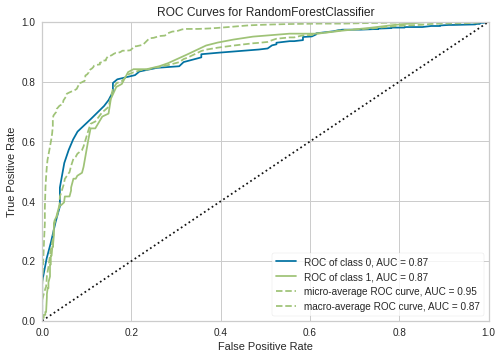

In [26]:
plot_model(rf)

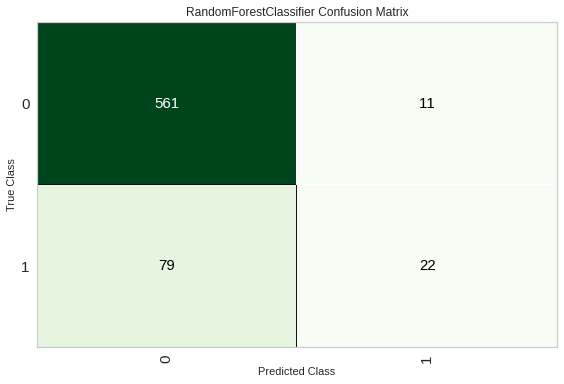

In [27]:
plot_model(rf, plot = 'confusion_matrix')

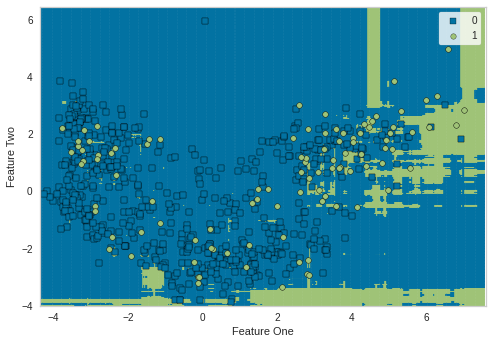

In [28]:
plot_model(rf, plot = 'boundary')

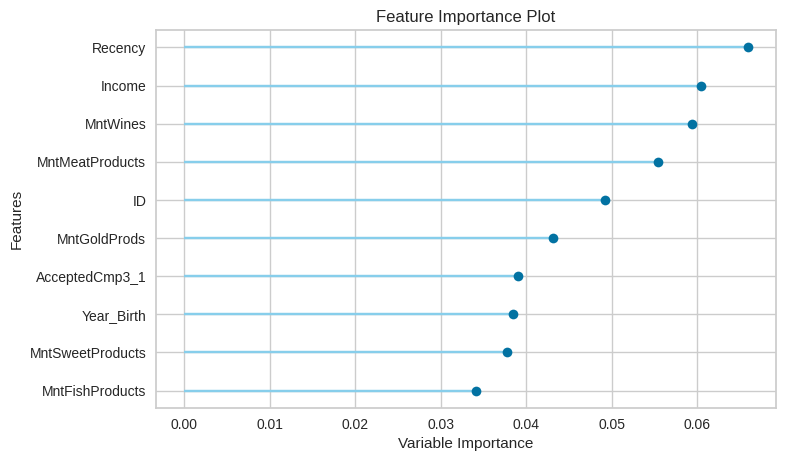

In [29]:
plot_model(rf, plot = 'feature')

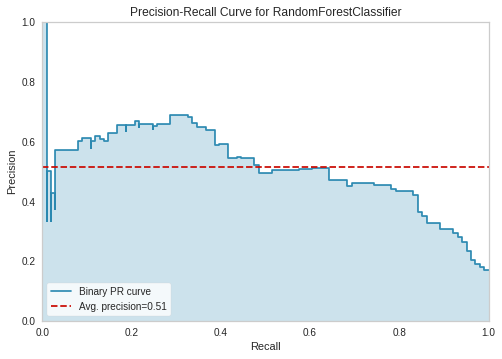

In [30]:
plot_model(rf, plot = 'pr')

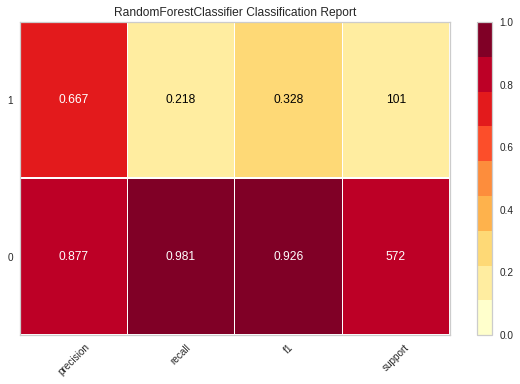

In [31]:
plot_model(rf, plot = 'class_report')

In [ ]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 10. Interpret Model

In [32]:
catboost = create_model('catboost', cross_validation=False)

ValueError: ignored

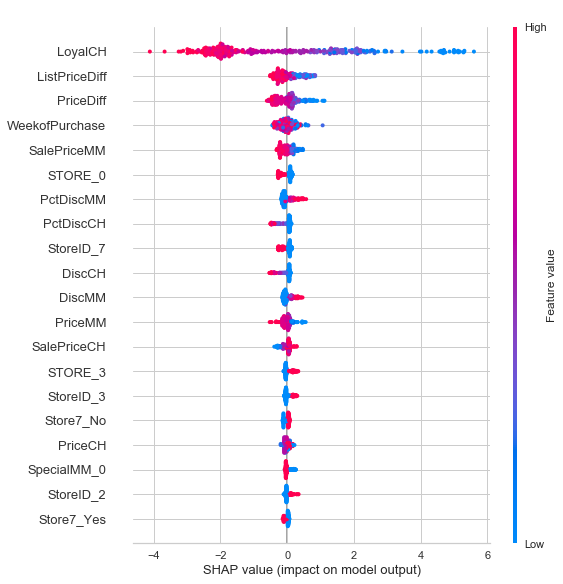

In [ ]:
interpret_model(catboost)

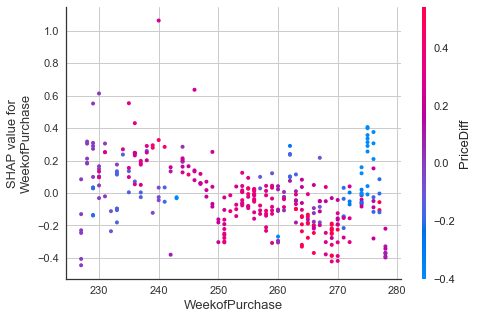

In [ ]:
interpret_model(catboost, plot = 'correlation')

In [ ]:
interpret_model(catboost, plot = 'reason', observation = 12)

# 11. AutoML()

In [33]:
best = automl(optimize = 'Recall')
best

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

# 12. Predict Model

In [34]:
pred_holdouts = predict_model(lr)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8588,0.7782,0.1881,0.5938,0.2857,0.2301,0.2776


,ID,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Kidhome_0,Kidhome_1,Kidhome_2,Teenhome_0,Teenhome_1,Teenhome_2,NumDealsPurchases_0,NumDealsPurchases_1,NumDealsPurchases_10,NumDealsPurchases_11,NumDealsPurchases_12,NumDealsPurchases_13,NumDealsPurchases_15,NumDealsPurchases_2,NumDealsPurchases_3,NumDealsPurchases_4,NumDealsPurchases_5,...,NumWebVisitsMonth_20,NumWebVisitsMonth_3,NumWebVisitsMonth_4,NumWebVisitsMonth_5,NumWebVisitsMonth_6,NumWebVisitsMonth_7,NumWebVisitsMonth_8,NumWebVisitsMonth_9,AcceptedCmp3_1,AcceptedCmp4_1,AcceptedCmp5_1,AcceptedCmp1_0,AcceptedCmp2_1,Complain_1,Z_CostContact_3,Z_Revenue_11,Dt_Customer_month_1,Dt_Customer_month_10,Dt_Customer_month_11,Dt_Customer_month_12,Dt_Customer_month_2,Dt_Customer_month_3,Dt_Customer_month_4,Dt_Customer_month_5,Dt_Customer_month_6,Dt_Customer_month_7,Dt_Customer_month_8,Dt_Customer_month_9,Dt_Customer_weekday_0,Dt_Customer_weekday_1,Dt_Customer_weekday_2,Dt_Customer_weekday_3,Dt_Customer_weekday_4,Dt_Customer_weekday_5,Dt_Customer_weekday_6,Dt_Customer_is_month_end_1,Dt_Customer_is_month_start_1,Response,Label,Score
0,1542.0,1975.0,56243.0,26.0,347.0,0.0,35.0,4.0,3.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8355
1,5967.0,1952.0,33402.0,60.0,26.0,2.0,19.0,10.0,5.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9463
2,11074.0,1977.0,85072.0,94.0,494.0,92.0,391.0,194.0,11.0,241.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9487
3,5232.0,1965.0,69139.0,23.0,86.0,12.0,75.0,33.0,15.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9198
4,3645.0,1972.0,27213.0,19.0,19.0,3.0,26.0,10.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0.8456


In [36]:
new_data = df.copy()
new_data.drop(['Response'], axis=1, inplace=True)
predict_new = predict_model(best, data=new_data)
predict_new.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Label,Score
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1.0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,1,1.0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,1,1.0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,1,1.0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,1,1.0


# 13. Save / Load Model

In [37]:
save_model(best, model_name='best-model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Response',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='Response')),
                 ('fix_perfect', Remove_100(target='Response')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'

In [38]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Response',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_str...
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='Response')),
                ('fix_perfect', Remove_100(target='Response')),
                ('clean_names', Clean_Colum_Names()),
            

In [39]:
from sklearn import set_config
set_config(display='diagram')
loaded_bestmodel[0]

DataTypes_Auto_infer(categorical_features=[], display_types=True,
                     features_todrop=[], id_columns=[],
                     ml_usecase='classification', numerical_features=[],
                     target='Response', time_features=[])

In [40]:
from sklearn import set_config
set_config(display='text')

# 14. Deploy Model

In [41]:
deploy_model(best, model_name = 'best-aws', authentication = {'bucket' : 'pycaret-test'})

ImportError: ignored

# 15. Get Config / Set Config

In [42]:
X_train = get_config('X_train')
X_train.head()

,ID,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Kidhome_0,Kidhome_1,Kidhome_2,Teenhome_0,Teenhome_1,Teenhome_2,NumDealsPurchases_0,NumDealsPurchases_1,NumDealsPurchases_10,NumDealsPurchases_11,NumDealsPurchases_12,NumDealsPurchases_13,NumDealsPurchases_15,NumDealsPurchases_2,NumDealsPurchases_3,NumDealsPurchases_4,NumDealsPurchases_5,...,NumWebVisitsMonth_17,NumWebVisitsMonth_19,NumWebVisitsMonth_2,NumWebVisitsMonth_20,NumWebVisitsMonth_3,NumWebVisitsMonth_4,NumWebVisitsMonth_5,NumWebVisitsMonth_6,NumWebVisitsMonth_7,NumWebVisitsMonth_8,NumWebVisitsMonth_9,AcceptedCmp3_1,AcceptedCmp4_1,AcceptedCmp5_1,AcceptedCmp1_0,AcceptedCmp2_1,Complain_1,Z_CostContact_3,Z_Revenue_11,Dt_Customer_month_1,Dt_Customer_month_10,Dt_Customer_month_11,Dt_Customer_month_12,Dt_Customer_month_2,Dt_Customer_month_3,Dt_Customer_month_4,Dt_Customer_month_5,Dt_Customer_month_6,Dt_Customer_month_7,Dt_Customer_month_8,Dt_Customer_month_9,Dt_Customer_weekday_0,Dt_Customer_weekday_1,Dt_Customer_weekday_2,Dt_Customer_weekday_3,Dt_Customer_weekday_4,Dt_Customer_weekday_5,Dt_Customer_weekday_6,Dt_Customer_is_month_end_1,Dt_Customer_is_month_start_1
203,2798.0,1977.0,102160.0,54.0,763.0,29.0,138.0,76.0,176.0,58.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1950,6663.0,1940.0,51141.0,96.0,144.0,0.0,7.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1812,8093.0,1969.0,79734.0,72.0,572.0,8.0,232.0,23.0,62.0,17.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
925,5871.0,1979.0,24401.0,98.0,73.0,28.0,217.0,10.0,24.0,115.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1577,9298.0,1947.0,81574.0,89.0,1252.0,0.0,465.0,46.0,35.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
get_config('seed')

123

In [ ]:
from pycaret.classification import set_config
set_config('seed', 999)

In [ ]:
get_config('seed')

999

# 16. MLFlow UI

In [ ]:
# !mlflow ui

# End
Thank you. For more information / tutorials on PyCaret, please visit https://www.pycaret.org